###Import The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset

In [ ]:
df=pd.read_csv("/content/Heart Disease data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Heart Disease data.csv'

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.columns
for column in df.columns :
    print(column)


age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


#Check Null and Duplicate Values  

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data_dup=df.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
#Remoe Duplicate Column
df=df.drop_duplicates()


In [ ]:
df.shape

(302, 14)

In [ ]:
data_dup=df.duplicated().any()
data_dup

False

#Data Processing

In [ ]:
#we find categorical And Continuous Value
cat_val=[]
cont_val=[]
for column in df.columns:
     if df[column].nunique() <=10:
         cat_val.append(column)
     else :
         cont_val.append(column)

In [ ]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

###Encoding Categorical Data

In [ ]:
df['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cat_val.remove("sex")
cat_val.remove("target")
pd.get_dummies(df,columns=cat_val,drop_first=True)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


###Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()
df[cat_val]=st.fit_transform(df[cat_val])


<ipython-input-31-7f8dc6b4a522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_val]=st.fit_transform(df[cat_val])


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,-0.935208,125,212,-0.418446,0.901657,168,-0.698344,1.0,0.979514,1.274980,1.119967,0
1,53,1,-0.935208,140,203,2.389793,-1.002541,155,1.431958,3.1,-2.271182,-0.714911,1.119967,0
2,70,1,-0.935208,145,174,-0.418446,0.901657,125,1.431958,2.6,-2.271182,-0.714911,1.119967,0
3,61,1,-0.935208,148,203,-0.418446,0.901657,161,-0.698344,0.0,0.979514,0.280034,1.119967,0
4,62,0,-0.935208,138,294,2.389793,0.901657,106,-0.698344,1.9,-0.645834,2.269926,-0.513994,0


###Splitting The Dataset into Training set and Test set

In [ ]:
X=df.drop('target',axis=1)

In [ ]:
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

###SVM

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.5901639344262295

###KNeighboursClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.639344262295082

In [ ]:
score=[]
for k  in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))


In [ ]:
score

[0.5737704918032787,
 0.5737704918032787,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6229508196721312,
 0.6721311475409836,
 0.6065573770491803,
 0.5901639344262295,
 0.5573770491803278,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.5573770491803278,
 0.5737704918032787,
 0.5737704918032787,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295]

In [ ]:
score=[]
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score.append(accuracy_score(y_test,y_pred))
score

[0.5737704918032787]

###Non-Linear ML Algorithms

In [ ]:
df=pd.read_csv("/content/Heart Disease data.csv")

In [ ]:
df.shape

(1025, 14)

In [ ]:
df=df.drop_duplicates()


In [ ]:
df.shape

(302, 14)

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=242)

###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()


In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8032786885245902

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

###Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.7868852459016393

In [ ]:
final_data = pd.DataFrame({'Models':["LR","SVM","KNN","DT","RF","GB"],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6),]})

In [ ]:
final_data

,Models,ACC
0,LR,0.524590
1,SVM,0.491803
2,KNN,0.508197
3,DT,0.803279
4,RF,0.868852
5,GB,0.786885


<ipython-input-86-0f55cb1424cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['Models'],y=final_data['ACC'],palette=["#1d7874","#8B0000",'green','orange','yellow','blue'])


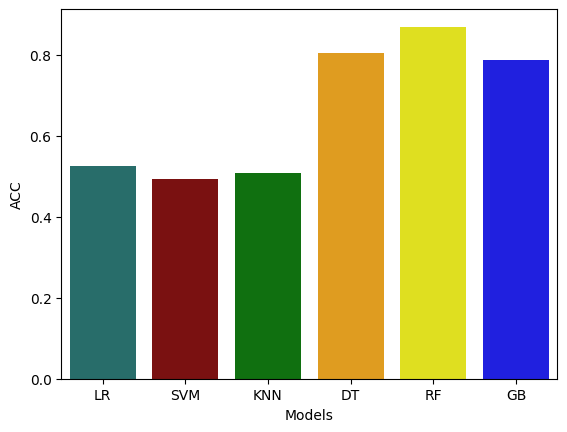

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'],palette=["#1d7874","#8B0000",'green','orange','yellow','blue'])
plt.show()

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X,y)

RandomForestClassifier()

###Prediction On New Dataset

In [ ]:
import pandas as pd


In [ ]:
new_data=pd.DataFrame({
'age':52,
'sex':1,
'cp':0,
'trestbps':125,
'chol':212,
'fbs':0,
'restecg':1,
'thalach':168,
'exang':0,
'oldpeak':1.0,
'slope':2,
'ca':2,
'thal':3,
},index=[0]
)

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p=rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Disease")

No Disease


In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [ ]:
model=joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)

array([0])

In [ ]:
from tkinter import *
import joblib
df show_entry_fields():
p1=int(e1.get())
p2=int(e2.get())
p3=int(e3.get())
p4=int(e4.get())
p5=int(e5.get())
p6=int(e6.get())
p7=int(e7.get())
p8=int(e8.get())
p9=int(e9.get())
p10=int(e10.get())
p11=int(e11.get())
p12=int(e12.get())
p13=int(e13.get())
model=joblib.load('model_joblib_heart')
result=model.predict([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13])
if result==0:
  Label(master,text="No Heart Disease").grid(row=31)
else:
  Label(master,text="Possibility ofHeart Disease").grid(row=31)
  master =Tk()
  master.title("Heart Disease Prediction Systems")
  label=Label(master,text="Heart Disease Prediction System",bg='black',fg='white').grid(row=0,columnspan=2)
  Label(master,text="No Heart Disease").grid(row=1)
  Label(master,text="No Heart Disease").grid(row=2)
  Label(master,text="No Heart Disease").grid(row=31)
  Label(master,text="No Heart Disease").grid(row=31)
  Label(master,text="No Heart Disease").grid(row=31)
  Label(master,text="No Heart Disease").grid(row=31)
  Label(master,text="No Heart Disease").grid(row=31)









SyntaxError: invalid syntax (<ipython-input-103-8e7d13f380d4>, line 1)